# Project Overview

Using variables like `GPA`, `GMAT scores`, and `work experience`, this research creates a machine learning model to forecast MBA admission decisions.  In order to help prospective students understand their prospects of acceptance, we plan to develop an accurate classifier by examining important admission criteria.

Given that there are three possible outcomes, the problem is multi-class classification.

# Dataset Overview & Initial Exploration

## Import Essential Libraries


In [23]:
# data handling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


## Load and Explore the Dataset

In [46]:
# load the dataset
mba_df = pd.read_csv('mba-admission-dataset.csv') 

# display the first few rows
print("Dataset Preview:")
display(mba_df.head())

# get dataset structure
print("\nDataset Info:")
mba_df.info()

# get dataset size
print('\nDataset Dimension')
mba_df.shape


Dataset Preview:


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB

Dataset Dimension


(6194, 10)

In [25]:
# getting unique labels
mba_df['admission'].value_counts().sort_values(ascending=False)

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

## Handle Missing Values

In [47]:
# check missing values in all columns
print("Missing values per column before handling:")
print(mba_df.isnull().sum())

# for categorical columns, fill missing with 'Unknown'
categorical_cols = ['gender', 'major', 'race', 'work_industry']
for col in categorical_cols:
    mba_df[col].fillna('Unknown', inplace=True)

# for numerical columns, fill missing with median
numerical_cols = ['gpa', 'gmat', 'work_exp']
for col in numerical_cols:
    mba_df[col].fillna(mba_df[col].median(), inplace=True)

# for target column, fill missing with most frequent value
mba_df['admission'].fillna(mba_df['admission'].mode()[0], inplace=True)

Missing values per column before handling:
application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


In [48]:
mba_df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Admit
2,3,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Admit
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Admit


## Encode Categorical Variables

In [27]:
# identify categorical columns
categorical_cols = mba_df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['gender', 'major', 'race', 'work_industry', 'admission']


In [28]:
# apply label encoding to the target column (admission)
le = LabelEncoder()
mba_df['admission'] = le.fit_transform(mba_df['admission'])
mba_df = pd.get_dummies(mba_df, columns=['gender', 'major', 'race', 'work_industry'], drop_first=True)

# display unique values after encoding
print("Encoded Admission Values:", mba_df['admission'].unique())

# display dataset after encoding
display(mba_df.head())

Encoded Admission Values: [0 1]


,application_id,international,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,False,3.30,620.0,3.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,3.28,680.0,5.0,0,True,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2,3,True,3.30,710.0,5.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,False,3.47,690.0,6.0,0,True,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,5,False,3.35,590.0,5.0,0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
mba_df.columns

Index(['application_id', 'international', 'gpa', 'gmat', 'work_exp',
       'admission', 'gender_Male', 'major_Humanities', 'major_STEM',
       'race_Black', 'race_Hispanic', 'race_Other', 'race_Unknown',
       'race_White', 'work_industry_Consulting', 'work_industry_Energy',
       'work_industry_Financial Services', 'work_industry_Health Care',
       'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology'],
      dtype='object')

# Feature Scaling & Data Splitting

## Standardize numerical features

In [30]:
# identify numerical columns (excluding target and encoded categorical features)
num_cols = mba_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# remove admission and application ID
num_cols = [col for col in num_cols if col not in ['admission', 'application_id']]

# Print the list
print("Numerical Columns:", num_cols)

Numerical Columns: ['gpa', 'gmat', 'work_exp']


In [31]:
# define the correct numerical columns (excluding application_id & admission)
num_cols = ['gpa', 'gmat', 'work_exp']  # only the features that should be standardized

# initialize StandardScaler
scaler = StandardScaler()

# standardize only the selected numerical columns
mba_df[num_cols] = scaler.fit_transform(mba_df[num_cols])

# display the dataset after fixing the issue
display(mba_df.tail())

,application_id,international,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
6189,6190,False,1.579147,-0.225052,-0.016421,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6190,6191,False,-0.466667,0.383580,-0.985085,0,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
6191,6192,True,-0.202691,0.586457,-0.016421,0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6192,6193,True,0.721225,-1.239437,-0.016421,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6193,6194,False,-0.136697,-0.022174,-0.985085,0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Train-Test Split

## Define Features (X) and Target (y)

In [32]:
# define features (X) and target (y)
X = mba_df.drop(columns=['admission', 'application_id'])  
y = mba_df['admission'] 

# display shapes
print("Feature Set Shape:", X.shape)
print("Target Variable Shape:", y.shape)

Feature Set Shape: (6194, 25)
Target Variable Shape: (6194,)


## Split Into Training & Testing Sets

In [33]:
# split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print dataset sizes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (4955, 25) (4955,)
Testing Set: (1239, 25) (1239,)


# Model Selection

In [34]:
# check the class distribution of 'admission'
admission_counts = mba_df['admission'].value_counts(normalize=True) 
admission_counts 

admission
0    0.983855
1    0.016145
Name: proportion, dtype: float64

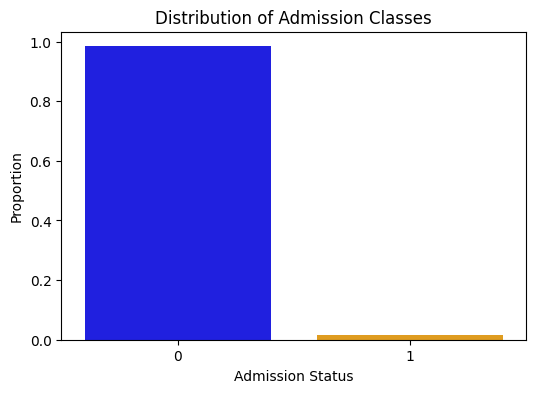

admission
0    0.983855
1    0.016145
Name: proportion, dtype: float64


In [35]:
# plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=admission_counts.index, y=admission_counts.values, palette=['blue', 'orange', 'green'])
plt.title("Distribution of Admission Classes")
plt.xlabel("Admission Status")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

# print the class distribution in numbers
print(admission_counts)

In [36]:
from imblearn.over_sampling import SMOTE

# apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# check new class distribution
print(y_train_balanced.value_counts())

admission
0    4875
1    4875
Name: count, dtype: int64


In [37]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

<Axes: title={'center': 'Feature Importance'}>

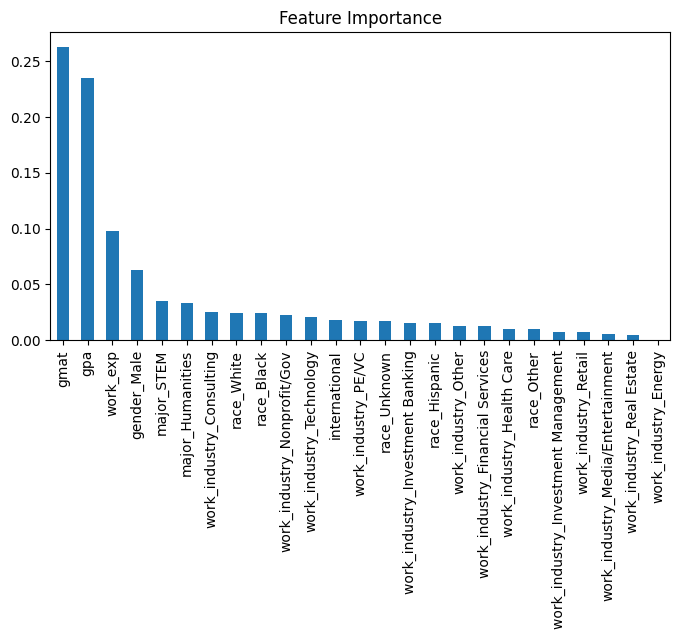

In [38]:
# train Random Forest to check feature importance
rf_model.fit(X_train, y_train)

# get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(8,4), title="Feature Importance")

In [39]:
# define models with class weights
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "SVM": SVC(class_weight="balanced")
}

# store evaluation metrics
model_scores = {}

# Train & Evaluate each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)  # train model
    y_pred = model.predict(X_test)  # predict

    # calculate weighted Precision, Recall, and F1-score
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    model_scores[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}
    print(f"{name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# identify the best model based on F1-score
best_model_name = max(model_scores, key=lambda x: model_scores[x]["F1-score"])
print(f"\nBest Model: {best_model_name} based on F1-score")


Logistic Regression - Precision: 0.9695, Recall: 0.9007, F1-score: 0.9331
Random Forest - Precision: 0.9679, Recall: 0.9790, F1-score: 0.9734
Decision Tree - Precision: 0.9702, Recall: 0.9613, F1-score: 0.9656
SVM - Precision: 0.9689, Recall: 0.9605, F1-score: 0.9646

Best Model: Random Forest based on F1-score


# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # number of trees
    "max_depth": [10, 20, None],  # tree depth
    "min_samples_split": [2, 5, 10],  # minimum samples to split
    "min_samples_leaf": [1, 2, 4],  # minimum samples per leaf
}

# initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced", random_state=42),
                           param_grid, cv=3, scoring="f1_weighted", n_jobs=-1)

# train on balanced dataset
grid_search.fit(X_train_balanced, y_train_balanced)

# best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
# Train Random Forest with best hyperparameters
final_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

# train final model on balanced dataset
final_rf_model.fit(X_train_balanced, y_train_balanced)

# make predictions on test data
y_pred_final = final_rf_model.predict(X_test)

# evaluate final model
print("Final Model Performance:\n")
print(classification_report(y_test, y_pred_final))

Final Model Performance:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1219
           1       0.00      0.00      0.00        20

    accuracy                           0.98      1239
   macro avg       0.49      0.50      0.49      1239
weighted avg       0.97      0.98      0.97      1239



# Deploying

In [42]:
import joblib

# save trained model
joblib.dump(final_rf_model, "final_admission_model.pkl")

print("✅ Model saved as final_admission_model.pkl")

✅ Model saved as final_admission_model.pkl


In [43]:
# load the saved model
loaded_model = joblib.load("final_admission_model.pkl")

# example: Custom input for prediction
custom_input = pd.DataFrame([{
    "international": True,
    "gpa": 0.5,
    "gmat": 1.0,
    "work_exp": 0.0,
    "gender_Male": True,
    "major_Humanities": False,
    "major_STEM": True,
    "race_Black": False,
    "race_Hispanic": False,
    "race_Other": False,
    "race_Unknown": False,
    "race_White": True,
    "work_industry_Consulting": False,
    "work_industry_Energy": False,
    "work_industry_Financial Services": False,
    "work_industry_Health Care": False,
    "work_industry_Investment Banking": False,
    "work_industry_Investment Management": False,
    "work_industry_Media/Entertainment": False,
    "work_industry_Nonprofit/Gov": False,
    "work_industry_Other": False,
    "work_industry_PE/VC": False,
    "work_industry_Real Estate": False,
    "work_industry_Retail": False,
    "work_industry_Technology": True
}])

custom_prediction = loaded_model.predict(custom_input)
print("Prediction for custom input:", custom_prediction)

Prediction for custom input: [0]
